In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### K-Means
- 대표적인 군집 알고리즘으로 군집의 중심을 찾는 작업
- 클러스터(Cluster) : 군집
- 클러스터링 : 군집화 하는 작업
- 과일 데이터에는 k가 3인 작업으로 k를 hyper parameter 

In [4]:
fruits = np.load('../Data/fruits.npy')
fruits.shape

(300, 100, 100)

In [5]:
# 3차원 데이터를 2차원 데이터로 변경하기
fruits_2d = fruits.reshape(-1,100*100)
fruits_2d.shape

(300, 10000)

In [6]:
# k-means Model
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [8]:
# 군집화한 Label 출력
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [9]:
# 군집화한 Cluster 갯수와 확인
np.unique(km.labels_, return_counts=True) #return_counts : unique한 갯수를 보여 준다.

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

In [10]:
# cluster 0이 111개 인지 확인
count0 = 0
for i in km.labels_:
    if i == 0:
        count0 += 1
print(count0)

111


In [11]:
def draw_fruits(arr, ratio=1): # ratio : 해상도 크기
    n = len(arr) # n : sample 갯수
    # 한 줄에 10개씩 이미지를 그린다. sample 갯수를 10으로 나누어 전체 행 갯수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개 이며 열 갯수는 sample 갯수이고, 그렇지 않으면 10개 이다.
    cols = n if rows< 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off') # xy 좌표? 가 불필요해서 off
    plt.show()

In [12]:
# draw_fruits(fruits[km.labels_ == 0]) # 0 이 파인애플? 

안되고 나서 이미지가 하나도 안나오네 슈ㅐㄷㅇ

### 클러스터 중심

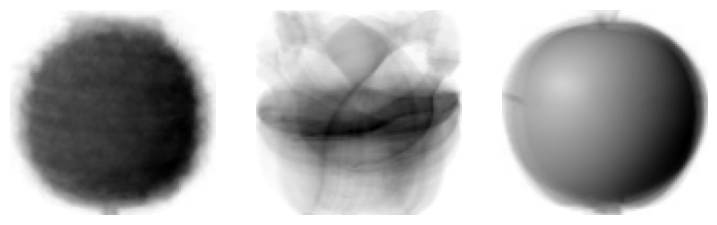

In [15]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

In [16]:
# 100번째의 클러스터 중심이 ㅇㄷ? 찾기 
km.transform(fruits_2d[100:101])

array([[3374.06980304, 8823.8971254 , 5252.22899617]])

In [17]:
# 100번째의 예측 군집값은?
km.predict(fruits_2d[100:101])

array([0], dtype=int32)

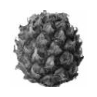

In [18]:
# 0(pineapple)이네 진짜 맞어?
draw_fruits(fruits[100:101])

In [19]:
# sample 갯수가 300개 인데 몇번을 움직이면서 군집을 찾은걸까?
# 현 K-Means의 반복횟수
km.n_iter_
# 4번 만에 분류가 끝났다.

4

---
### 최적의 k값 찾기 (** )

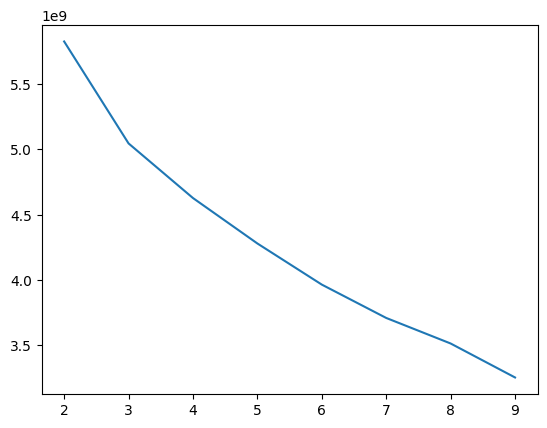

In [20]:

scores = []
for k in range(2,10): # 범위는 임의로 내가 정하는거임 1개일리는 없으니 2부터 시작해서 최적의 값을 찾는거임
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    scores.append(km.inertia_)

plt.plot(range(2,10), scores)
plt.show()

찾는 방법은 elbow point 꺽이는 값을 찾는것  = 3
Elbow Method : Cluster 간의 거리의 합을 나타내는 inertia(관성)가 급격히 떨어지는 구간이 생기는데 이 지점의 k값을 군집의 갯수로 사용